**Корректность проверена на Python 3.7:**
+ pandas 0.23.0
+ numpy 1.14.5

# Доверительные интервалы на основе bootstrap

In [1]:
import numpy as np
import pandas as pd

In [2]:
print(np.__version__)
print(pd.__version__)

1.17.2
0.25.1


In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Загрузка данных

### Время ремонта телекоммуникаций

Verizon — основная региональная телекоммуникационная компания (Incumbent Local Exchange Carrier, ILEC) в западной 
части США. В связи с этим данная компания обязана предоставлять сервис ремонта телекоммуникационного оборудования 
не только для своих клиентов, но и для клиентов других локальных телекоммуникационых компаний (Competing Local Exchange Carriers, CLEC). При этом в случаях, когда время ремонта оборудования для клиентов других компаний существенно выше, чем для собственных, Verizon может быть оштрафована. 

In [4]:
data = pd.read_csv('verizon.txt', sep='\t')
data.shape

(1687, 2)

In [5]:
data.head()

,Time,Group
0,17.50,ILEC
1,2.40,ILEC
2,0.00,ILEC
3,0.65,ILEC
4,22.23,ILEC


In [6]:
data.Group.value_counts()

ILEC    1664
CLEC      23
Name: Group, dtype: int64

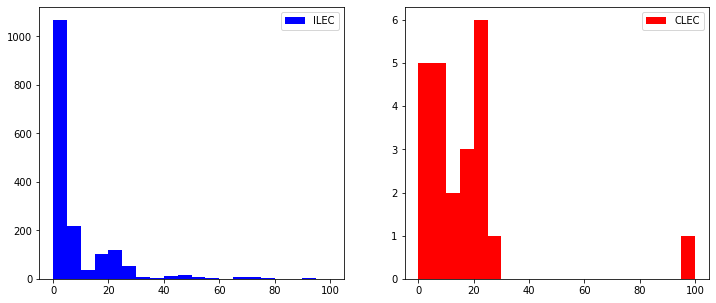

In [7]:
pylab.figure(figsize(12, 5))
pylab.subplot(1,2,1)
pylab.hist(data[data.Group == 'ILEC'].Time, bins = 20, color = 'b', range = (0, 100), label = 'ILEC')
pylab.legend()

pylab.subplot(1,2,2)
pylab.hist(data[data.Group == 'CLEC'].Time, bins = 20, color = 'r', range = (0, 100), label = 'CLEC')
pylab.legend()

pylab.show()

## Bootstrap

In [8]:
def get_bootstrap_samples(data, n_samples):
    indices = np.random.randint(0, len(data), (n_samples, len(data)))
    samples = data[indices]
    return samples

In [9]:
def stat_intervals(stat, alpha):
    boundaries = np.percentile(stat, [100 * alpha / 2., 100 * (1 - alpha / 2.)])
    return boundaries

### Интервальная оценка медианы

In [10]:
ilec_time = data[data.Group == 'ILEC'].Time.values
clec_time = data[data.Group == 'CLEC'].Time.values

In [11]:
np.random.seed(0)

ilec_median_scores = list(map(np.median, get_bootstrap_samples(ilec_time, 1000)))
clec_median_scores = list(map(np.median, get_bootstrap_samples(clec_time, 1000)))

print("95% confidence interval for the ILEC median repair time:",  stat_intervals(ilec_median_scores, 0.05))
print("95% confidence interval for the CLEC median repair time:",  stat_intervals(clec_median_scores, 0.05))

95% confidence interval for the ILEC median repair time: [3.18    3.82525]
95% confidence interval for the CLEC median repair time: [ 5.79125 20.     ]


In [12]:
ilec_median_scores

[3.52,
 3.45,
 3.43,
 3.72,
 3.65,
 3.78,
 3.59,
 3.5,
 3.65,
 3.51,
 3.65,
 3.53,
 3.585,
 3.65,
 3.35,
 3.54,
 3.73,
 3.18,
 3.35,
 3.5,
 3.73,
 3.425,
 3.7,
 3.85,
 3.35,
 3.48,
 3.7,
 3.575,
 3.71,
 3.6399999999999997,
 3.68,
 3.465,
 3.5,
 3.6,
 3.74,
 3.525,
 3.33,
 3.53,
 3.8,
 3.6,
 3.625,
 3.22,
 3.49,
 3.525,
 3.68,
 3.62,
 3.125,
 3.415,
 3.6,
 3.55,
 3.84,
 3.4,
 3.32,
 3.7,
 3.6399999999999997,
 3.53,
 3.6,
 3.6,
 3.6399999999999997,
 3.55,
 3.5,
 3.65,
 3.75,
 3.53,
 3.65,
 3.85,
 3.3899999999999997,
 3.58,
 3.65,
 3.7,
 3.57,
 3.7,
 3.62,
 3.65,
 3.34,
 3.6,
 3.525,
 3.65,
 3.53,
 3.79,
 3.41,
 3.72,
 3.47,
 3.5599999999999996,
 3.4,
 3.6399999999999997,
 3.65,
 3.7,
 3.22,
 3.68,
 3.72,
 3.6,
 3.58,
 3.52,
 3.675,
 3.53,
 3.6399999999999997,
 3.475,
 3.6,
 3.54,
 3.85,
 3.84,
 3.65,
 3.545,
 3.53,
 3.48,
 3.635,
 3.6,
 3.6,
 3.5,
 3.65,
 3.8,
 3.41,
 3.525,
 3.75,
 3.5599999999999996,
 3.8,
 3.3899999999999997,
 3.82,
 3.325,
 3.67,
 3.6,
 3.65,
 3.78,
 3.365,
 3.6,
 3.

### Точечная оценка разности медиан

In [13]:
print("difference between medians:", np.median(clec_time) - np.median(ilec_time))

difference between medians: 10.74


### Интервальная оценка разности медиан

In [14]:
delta_median_scores = list(map(lambda x: x[1] - x[0], zip(ilec_median_scores, clec_median_scores)))

In [15]:
print("95% confidence interval for the difference between medians",  stat_intervals(delta_median_scores, 0.05))

95% confidence interval for the difference between medians [ 2.04975 16.63   ]


In [16]:
delta_median_scores

[1.9300000000000002,
 14.52,
 2.3699999999999997,
 4.879999999999999,
 14.92,
 4.82,
 5.01,
 15.07,
 4.949999999999999,
 15.06,
 10.68,
 10.600000000000001,
 2.215,
 14.92,
 10.98,
 16.34,
 4.869999999999999,
 16.7,
 5.25,
 10.63,
 14.239999999999998,
 10.905000000000001,
 14.27,
 16.029999999999998,
 16.93,
 10.65,
 16.580000000000002,
 4.755,
 16.169999999999998,
 10.490000000000002,
 16.32,
 4.865,
 14.469999999999999,
 14.97,
 10.59,
 16.355,
 11.0,
 16.349999999999998,
 16.2,
 5.0,
 14.945,
 5.379999999999999,
 4.84,
 14.444999999999999,
 10.65,
 14.95,
 15.445,
 2.035,
 5.0,
 14.419999999999998,
 14.73,
 10.93,
 2.1300000000000003,
 10.629999999999999,
 10.690000000000001,
 5.07,
 5.0,
 10.530000000000001,
 14.329999999999998,
 16.73,
 5.1,
 14.319999999999999,
 16.13,
 10.600000000000001,
 2.15,
 14.12,
 2.41,
 5.02,
 10.48,
 10.43,
 14.399999999999999,
 10.629999999999999,
 14.95,
 16.23,
 5.26,
 10.73,
 10.805,
 10.68,
 15.040000000000001,
 10.54,
 15.16,
 10.61,
 16.53,
 15.0